<a href="https://colab.research.google.com/github/nevermess/Hand-Written-Digit-Recogniser/blob/master/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import cv2
import keras
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,BatchNormalization,Dropout,Flatten,Input
import matplotlib.pyplot as plt

In [0]:
model=tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/model2.h5')

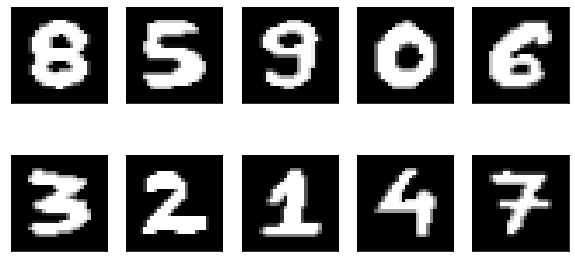

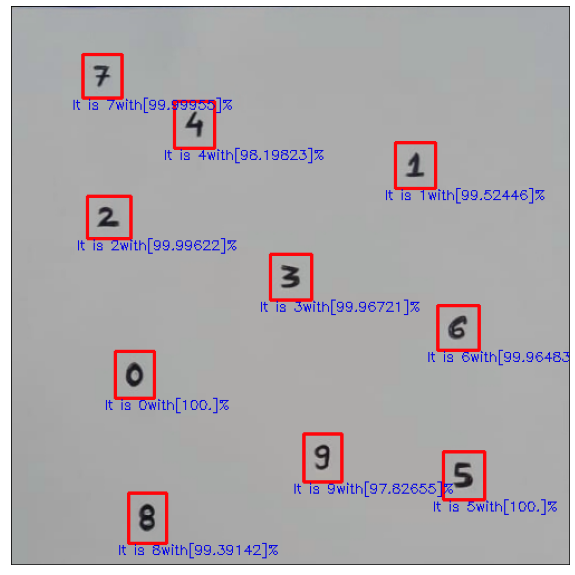

In [0]:
img=cv2.imread("/content/drive/My Drive/Colab Notebooks/digit2.jpg",1)
img=cv2.resize(img,(500,500))
#plt.imshow(img)
#kernel=np.zeros((3,3),np.uint8)
img1=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh=cv2.threshold(img1,115,255,cv2.THRESH_BINARY_INV)
#thresh=cv2.dilate(secondary,kernel,iterations=1)
#plt.imshow(thresh,cmap='gray')
plt.figure(figsize=(10,5))
contour,_= cv2.findContours(thresh,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)
i=0
for cnt in contour:
    if cv2.contourArea(cnt)>40:
        (x,y,w,h)=cv2.boundingRect(cnt)
        cv2.rectangle(img,(x-10,y-10),(x+w+10,y+h+10),(255,5,10),2)
        #plt.imshow(img)
        secondary=thresh[y-5:y+h+5,x-5:x+w+5]
        secondary=cv2.resize(secondary,(28,28))
        plt.subplot(2,5,i+1)
        plt.imshow(secondary,cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
        secondary=secondary.reshape(1,28,28,1)
        #secondary=cv2.erode(secondary,kernel,iterations=1)
        #secondary=cv2.dilate(secondary,kernel,iterations=1)
        #_,secondary=cv2.threshold(secondary,100,255,cv2.THRESH_BINARY)
        #plt.imshow(secondary,cmap='gray')
        X=secondary/255.
        pred=model.predict(X)
        confidence=np.amax(pred)/np.sum(pred,1)*100
        text="It is "+str(np.argmax(pred))+'with'+str(confidence)+'%'
        cv2.putText(img,text,(x-20,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,0.4,(5,5,230))
        #print(result,'--',confidence,x,y,w,h)
        i=i+1
plt.show()
plt.figure(figsize=(10,30))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()